In [151]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
from utils import fetch_dataset

In [152]:
class Dataset():
    def __init__(self, name):
        self.name = name
        dataset = fetch_dataset(self.name, verbose=False)
        self.metadata = dataset.metadata
        G, self.y = dataset.data, dataset.target
        self.graphs = []
        self.G = nx.Graph()
        
        if self.metadata[name]["nl"] == True:
            self.node_labels = list(set(label for g in G for label in g[1].values()))
            node_cmap = plt.get_cmap('coolwarm', len(self.node_labels))
            # +2 changes the color map to start from 2
            self.node_color_map = {self.node_labels[index]: node_cmap(index+2) for index in range(len(self.node_labels))}
            for g in G:
                nx_G = nx.Graph()
                for node in g[1].items():
                    self.G.add_node(node[0], label=node[1])
                    nx_G.add_node(node[0], label=node[1])
                self.graphs.append(nx_G)

            if self.metadata[name]["el"] == True:
                self.edge_labels = list(set(label for g in G for label in g[2].values()))
                for g, graph in zip(G, self.graphs):
                    for edge in g[2].items():
                        self.G.add_edge(edge[0][0], edge[0][1], type=edge[1])
                        graph.add_edge(edge[0][0], edge[0][1], type=edge[1])
            
            else:
                for g, graph in zip(G, self.graphs):
                    for edge in g[0]:
                        self.G.add_edge(edge[0], edge[1])
                        graph.add_edge(edge[0], edge[1])
                        
        else:
            if self.metadata[name]["el"] == True:
                self.edge_labels = list(set(label for g in G for label in g[2].values()))
                for g in G:
                    nx_G = nx.Graph()
                    for edge in g[2].items():
                        self.G.add_edge(edge[0][0], edge[0][1], type=edge[1])
                        nx_G.add_edge(edge[0][0], edge[0][1], type=edge[1])
                    self.graphs.append(nx_G)
                        
            else:
                for g in G:
                    nx_G = nx.Graph()
                    for edge in g[0]:
                        self.G.add_edge(edge[0], edge[1])
                        nx_G.add_edge(edge[0], edge[1])
                    self.graphs.append(nx_G)    

        # # node colors
        # node_color = [self.node_color_map[label[1]] for label in self.graph.nodes(data="label")]

        # # +1 for edge width, because edge width 0 is not visible
        # edge_width = [type[2]+1 for type in dataset.G.edges(data="type")]

    def plot_class_distribution(self):
        fig, ax = plt.subplots(figsize=(6, 5))
        counter = Counter(self.y)
        bars = ax.bar(counter.keys(), counter.values(), width=0.4)
        for bars in ax.containers:
            # make the numbers on bars away from the bars
            ax.bar_label(bars, padding=3)

        # give each bar a different color, using colormap
        cmap = plt.get_cmap("tab20")
        for i, bar in enumerate(bars):
            bar.set_color(cmap(i))

        # make the y-axis larger to show the numbers on bars
        ax.margins(y=0.1)
        ax.set_xlabel("Class")
        ax.set_ylabel("Number of samples")
        ax.set_title(self.name + " dataset")
        plt.show()

In [153]:
dataset = Dataset("COX2")

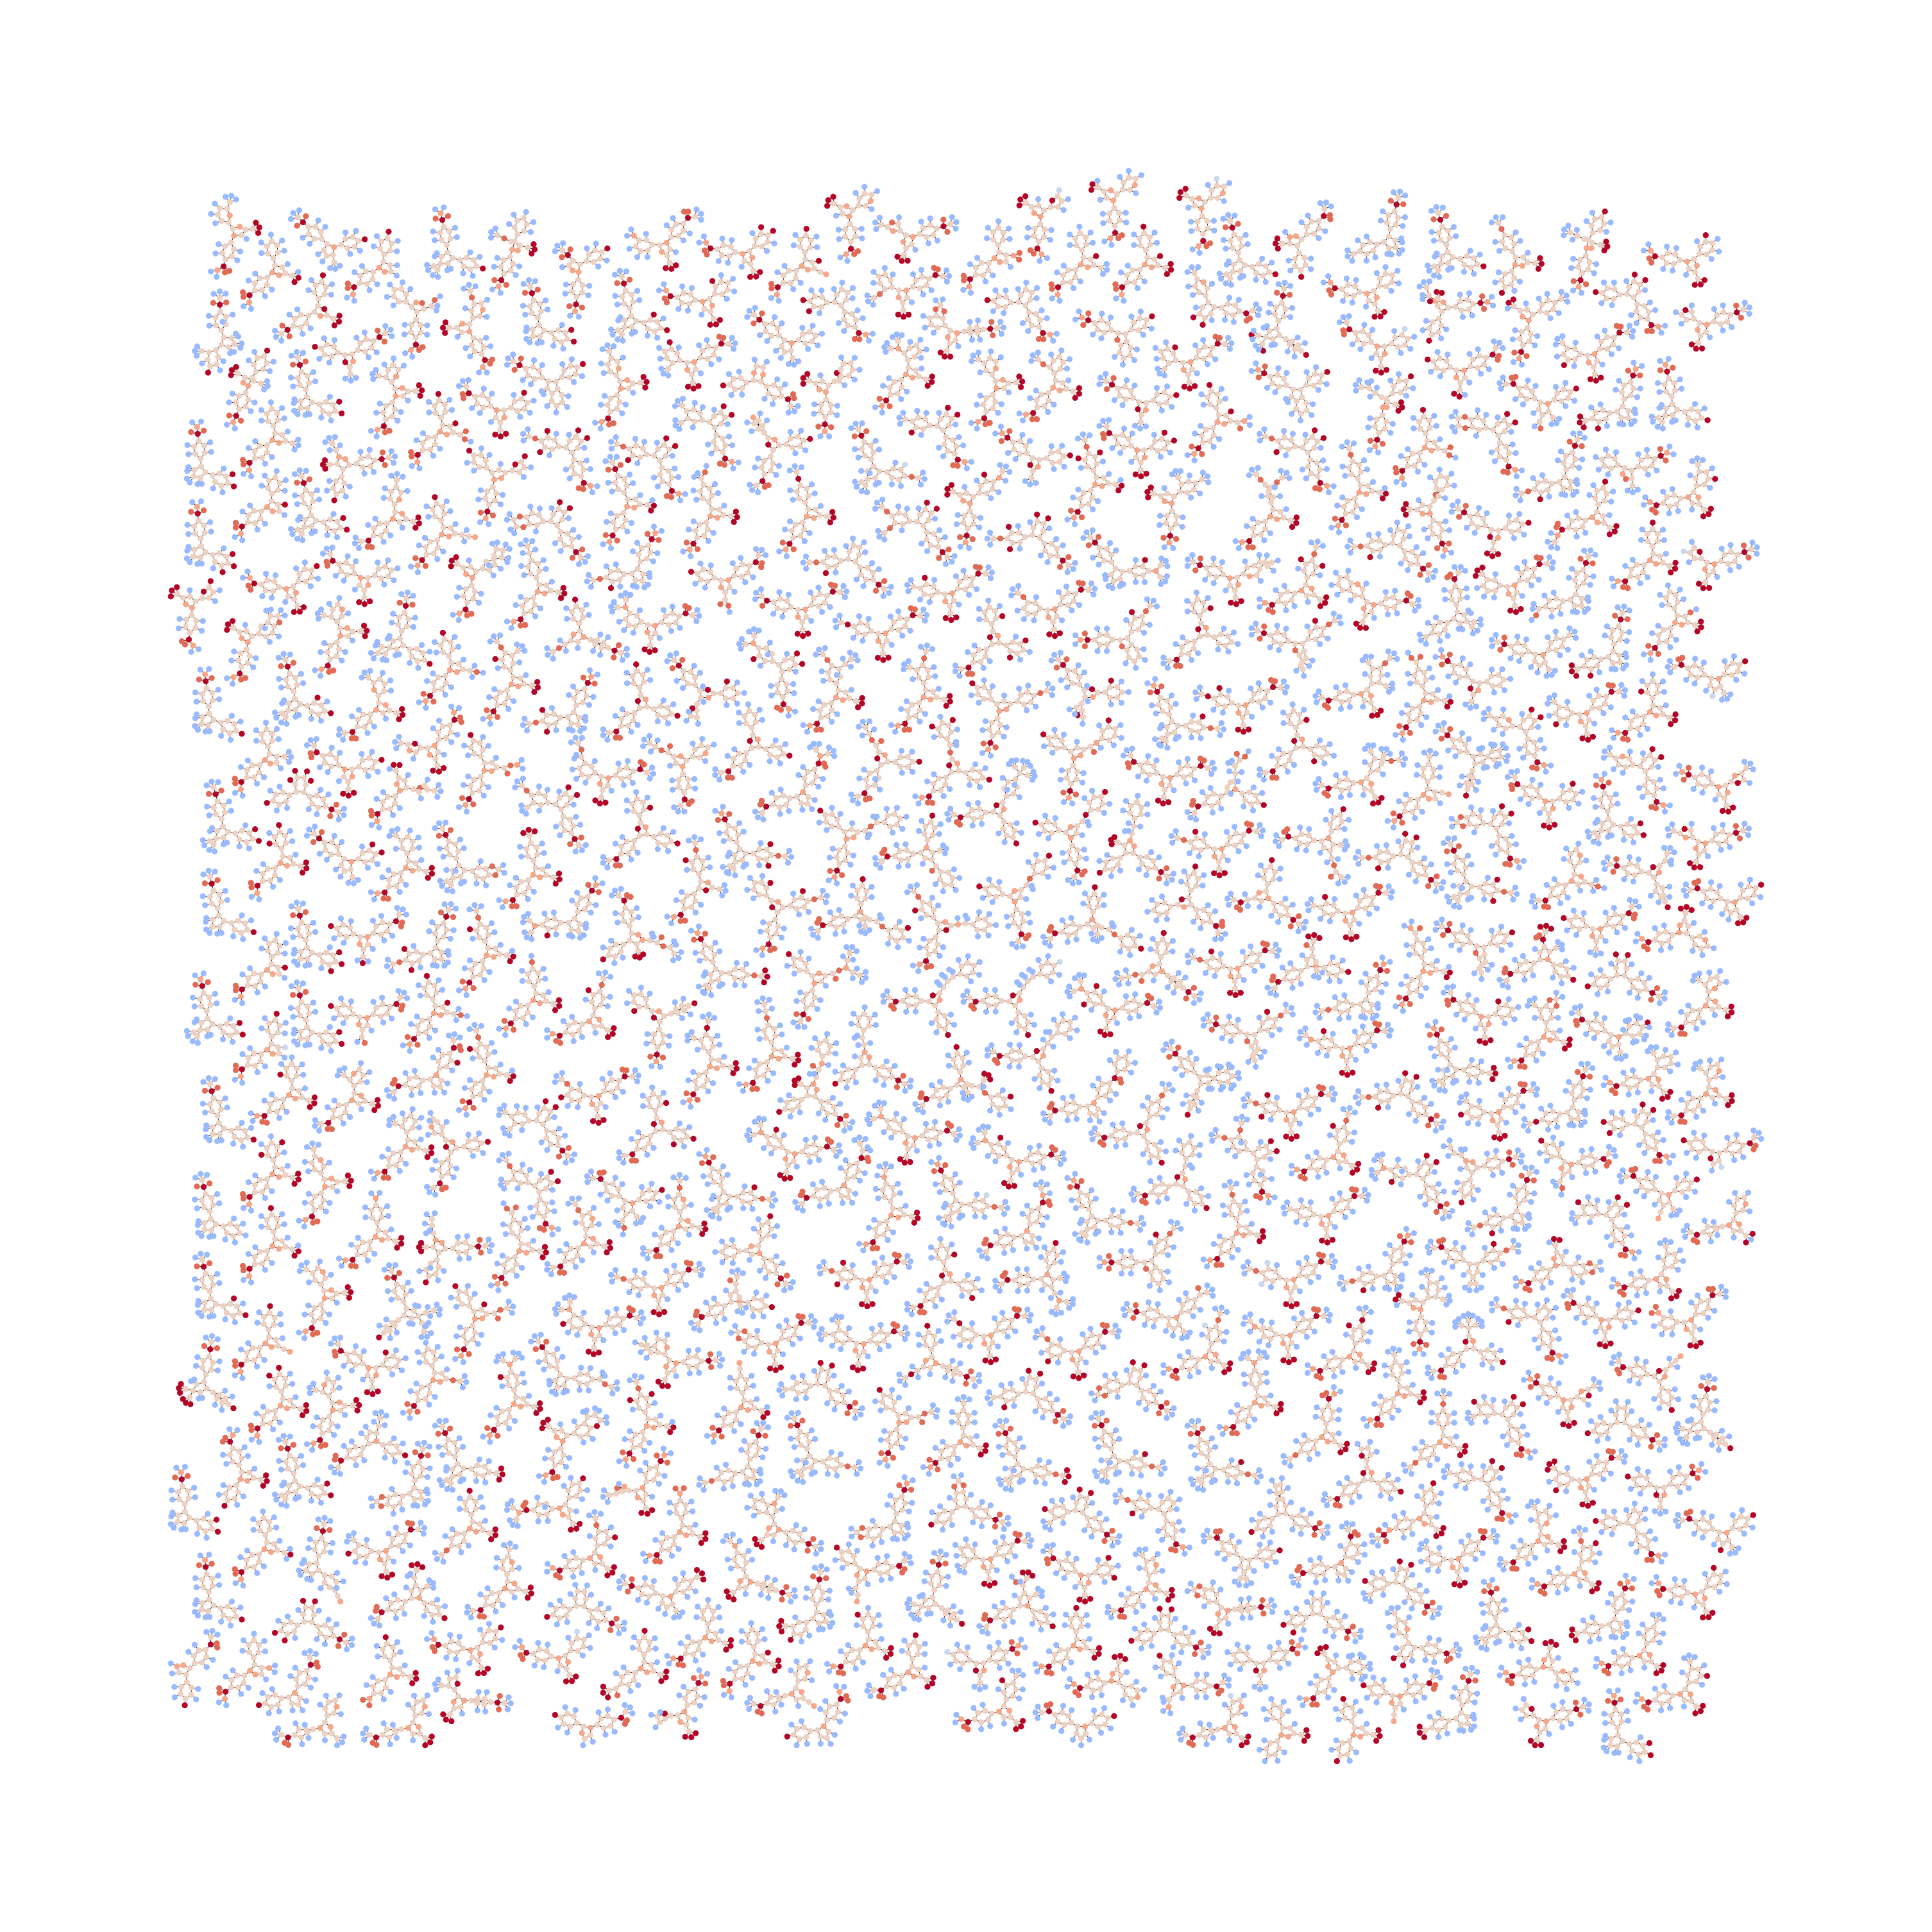

In [154]:
plt.figure(figsize=(50, 50), dpi=60)
pos = nx.nx_agraph.pygraphviz_layout(dataset.G)
nx.draw(dataset.G, pos=pos, node_color=[dataset.node_color_map[label[1]] for label in dataset.G.nodes(data="label")], node_size=100) # width=[type[2]+1 for type in dataset.G.edges(data="type")]